In [1]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime

## pandas

This notebook is intended to give you some basic experience with the features and capabilities of the pandas data framework

For more information about pandas

1. [https://pandas.pydata.org/docs/user_guide/index.html](pandas User Guide)
1. [https://pandas.pydata.org/docs/user_guide/10min.html](10 Minutes to pandas)
1. [https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html#](pandas Getting Started Tutorials)

### Data Structures

There are two basic data structures that pandas implements:

1. Series - 1-D labeled homogeneously-typed array (that type may be `object`)

In [2]:
a = [1.0, 2.0, 3.0, 4.0]
b = ["one", "two", "three", "four"]
c = ["one", 2.0, "three", 4.0]

x = pd.Series(a)
y = pd.Series(b)
z = pd.Series(c)

print(x)
print(y)
print(z)

0    1.0
1    2.0
2    3.0
3    4.0
dtype: float64
0      one
1      two
2    three
3     four
dtype: object
0      one
1      2.0
2    three
3      4.0
dtype: object


1. The DataFrame -  General 2D labeled, size mutable tabular structure with potentially heterogenous-typed columns

In [3]:
d = {"Name": ["Shawn", "Dana", "Chloe", "Jason", "Megan", "Dessa", "Lincoln"],
     "Age": [47, 47, 18, 47, 40, 9, 5],
     "Pronoun":["he","she","she","he","she","she","he"]}
df = pd.DataFrame(d)
df

,Name,Age,Pronoun
0,Shawn,47,he
1,Dana,47,she
2,Chloe,18,she
3,Jason,47,he
4,Megan,40,she
5,Dessa,9,she
6,Lincoln,5,he


In [4]:
df.dtypes

Name       object
Age         int64
Pronoun    object
dtype: object

You can specify the data type of a column, needs to adhere to normal python casting rules

In [ ]:
n_df = df.astype({"Age":"float"})
n_df.dtypes

Each Column of the DataFrame is a Series

In [6]:
df["Age"]

0    47
1    47
2    18
3    47
4    40
5     9
6     5
Name: Age, dtype: int64

### Subsetting by Columns

Produces another DataFrame

In [7]:
df[["Name","Pronoun"]]

,Name,Pronoun
0,Shawn,he
1,Dana,she
2,Chloe,she
3,Jason,he
4,Megan,she
5,Dessa,she
6,Lincoln,he


### A word about saving work

In order to actually save or transform the dataframe, you need to set an operation equal to the dataframe (or a new one).


In [8]:
print(df.dtypes)

print("===============")
df.astype({"Age":"float"})
print(df.dtypes)

print("===============")
df = df.astype({"Age":"float"})
print(df.dtypes)

Name       object
Age         int64
Pronoun    object
dtype: object
Name       object
Age         int64
Pronoun    object
dtype: object
Name        object
Age        float64
Pronoun     object
dtype: object


### loc and iloc

`.loc` is used to define a labelled base selection
`.iloc` is used to define row integer based selection

In [9]:
df.loc[df["Name"]=="Shawn"]

,Name,Age,Pronoun
0,Shawn,47.0,he


In [10]:
df.iloc[2]

Name       Chloe
Age         18.0
Pronoun      she
Name: 2, dtype: object

In [11]:
s_df = df.sort_values("Age", axis=0)
s_df

,Name,Age,Pronoun
6,Lincoln,5.0,he
5,Dessa,9.0,she
2,Chloe,18.0,she
4,Megan,40.0,she
0,Shawn,47.0,he
1,Dana,47.0,she
3,Jason,47.0,he


In [12]:
print("With loc: {}".format(s_df.loc[6]))
print("With iloc: {}".format(s_df.iloc[6]))


With loc: Name       Lincoln
Age            5.0
Pronoun         he
Name: 6, dtype: object
With iloc: Name       Jason
Age         47.0
Pronoun       he
Name: 3, dtype: object


### Indexing a DataFrame

In [13]:
df.index

RangeIndex(start=0, stop=7, step=1)

the `.loc` member allows you to chose rows by indexes

In [14]:
df.loc[0]

Name       Shawn
Age         47.0
Pronoun       he
Name: 0, dtype: object

You can set your own index column

In [15]:
new_df = df.set_index("Name")
new_df

,Age,Pronoun
Name,,
Shawn,47.0,he
Dana,47.0,she
Chloe,18.0,she
Jason,47.0,he
Megan,40.0,she
Dessa,9.0,she
Lincoln,5.0,he


In [16]:
new_df.loc["Shawn"]

Age        47.0
Pronoun      he
Name: Shawn, dtype: object

Index columns do not need to be unique

In [17]:
new_2_df = df.set_index("Age")
new_2_df

,Name,Pronoun
Age,,
47.0,Shawn,he
47.0,Dana,she
18.0,Chloe,she
47.0,Jason,he
40.0,Megan,she
9.0,Dessa,she
5.0,Lincoln,he


In [18]:
new_2_df.loc[47]

,Name,Pronoun
Age,,
47.0,Shawn,he
47.0,Dana,she
47.0,Jason,he


### Multi-indexing

One can define a multi-level indexing scheme

In [ ]:
new_3_df = df.set_index(["Name","Pronoun"])
new_3_df

In [ ]:
new_3_df.loc["Shawn","he"]

### Combining data

#### Concatenating objects

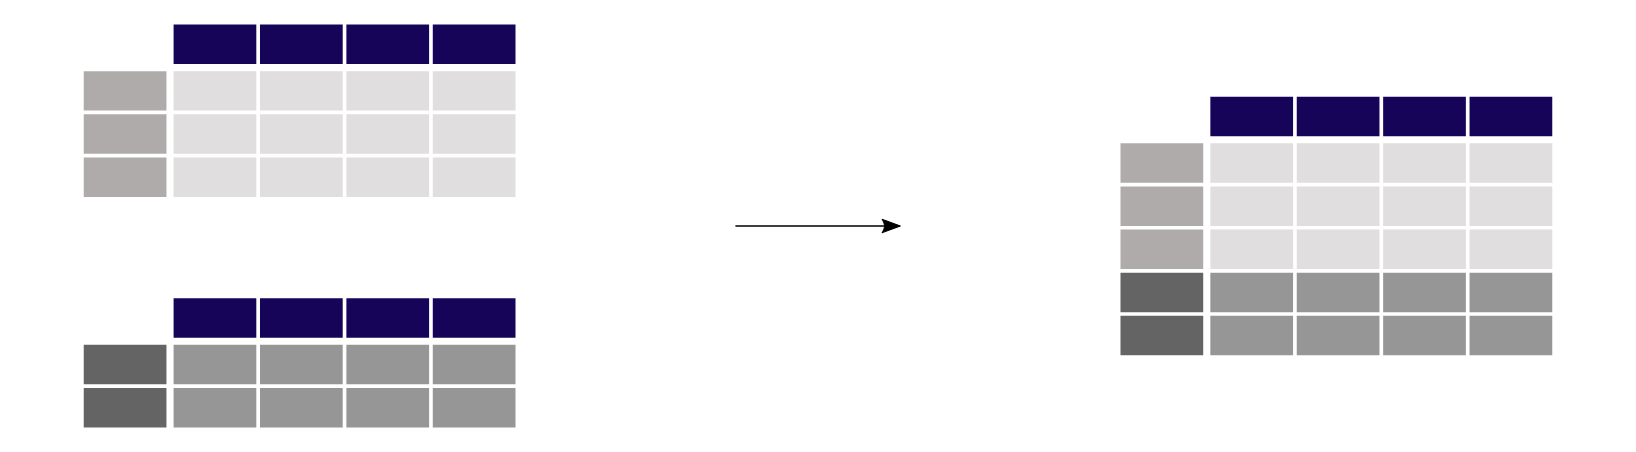

In [21]:
new_dict = {"Name":["Tom","Becca","Max"],
            "Age": [48,19,17],
            "Pronoun":["he","she","he"],
            "Profession":["Writer","Student","Student"]}

n_df = pd.concat([df,pd.DataFrame(new_dict)])
n_df

,Name,Age,Pronoun,Profession
0,Shawn,47.0,he,NaN
1,Dana,47.0,she,NaN
2,Chloe,18.0,she,NaN
3,Jason,47.0,he,NaN
4,Megan,40.0,she,NaN
5,Dessa,9.0,she,NaN
6,Lincoln,5.0,he,NaN
0,Tom,48.0,he,Writer
1,Becca,19.0,she,Student
2,Max,17.0,he,Student


#### Joining tables using common identifier

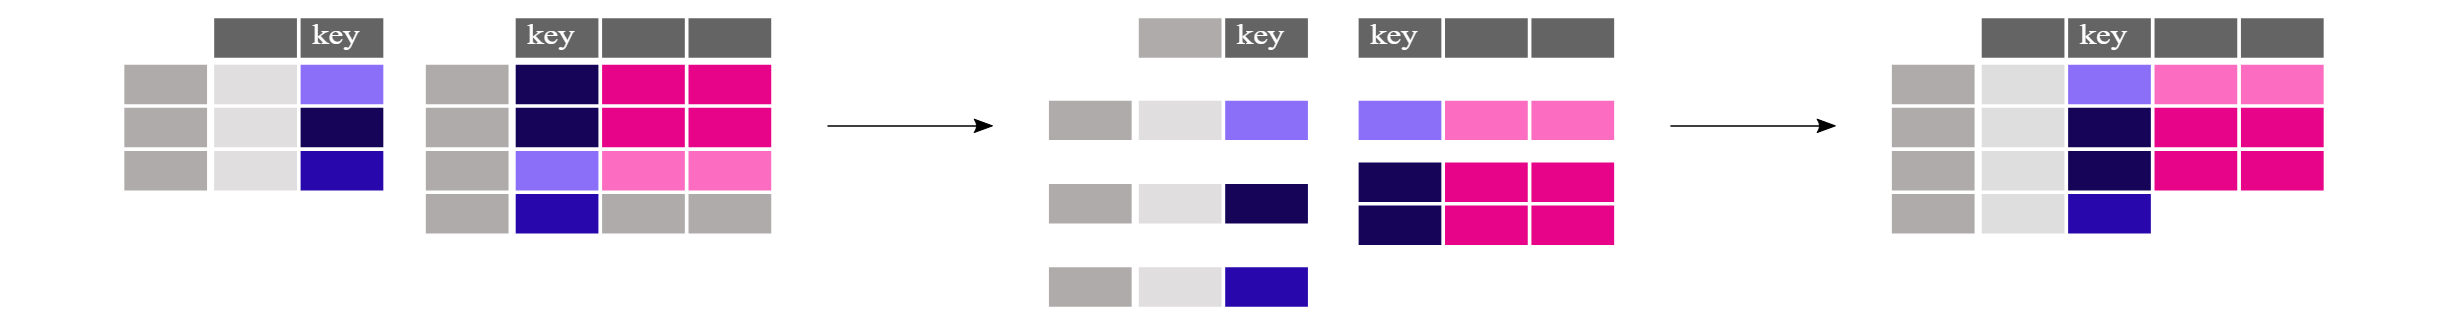

In [22]:
new_dict = {"Name": ["Shawn", "Dana", "Chloe", "Jason", "Megan"],
            "Profession":["Director","Administrator","Student","Educator","Editor"],
            "YearsAtJob":[25,6,1,17,10]}

n_df = pd.DataFrame(new_dict)

df 

,Name,Age,Pronoun
0,Shawn,47.0,he
1,Dana,47.0,she
2,Chloe,18.0,she
3,Jason,47.0,he
4,Megan,40.0,she
5,Dessa,9.0,she
6,Lincoln,5.0,he


In [23]:
n_df

,Name,Profession,YearsAtJob
0,Shawn,Director,25
1,Dana,Administrator,6
2,Chloe,Student,1
3,Jason,Educator,17
4,Megan,Editor,10


In [24]:
df_merged_right = pd.merge(df, n_df, how="right", on="Name")
df_merged_right

,Name,Age,Pronoun,Profession,YearsAtJob
0,Shawn,47.0,he,Director,25
1,Dana,47.0,she,Administrator,6
2,Chloe,18.0,she,Student,1
3,Jason,47.0,he,Educator,17
4,Megan,40.0,she,Editor,10


In [25]:
df_merged_left = pd.merge(df, n_df, how="left", on="Name")
df_merged_left

,Name,Age,Pronoun,Profession,YearsAtJob
0,Shawn,47.0,he,Director,25.0
1,Dana,47.0,she,Administrator,6.0
2,Chloe,18.0,she,Student,1.0
3,Jason,47.0,he,Educator,17.0
4,Megan,40.0,she,Editor,10.0
5,Dessa,9.0,she,NaN,NaN
6,Lincoln,5.0,he,NaN,NaN


### Some basic things we can do with DataFrames and Series


In [26]:
df["Age"].max()

47.0

In [27]:
df.describe()

,Age
count,7.000000
mean,30.428571
std,19.042559
min,5.000000
25%,13.500000
50%,40.000000
75%,47.000000
max,47.000000


In [28]:
df.shape

(7, 3)

In [29]:
df.head()

,Name,Age,Pronoun
0,Shawn,47.0,he
1,Dana,47.0,she
2,Chloe,18.0,she
3,Jason,47.0,he
4,Megan,40.0,she


### Basic Filtering

In [30]:
### Let's say we want to create dataframes that filter the data

new_df = df[df['Age'] == 47]
new_df

,Name,Age,Pronoun
0,Shawn,47.0,he
1,Dana,47.0,she
3,Jason,47.0,he


In [31]:
new_df = df[df['Pronoun'] == "she"]
new_df

,Name,Age,Pronoun
1,Dana,47.0,she
2,Chloe,18.0,she
4,Megan,40.0,she
5,Dessa,9.0,she


In [32]:
new_df = df[(df["Age"] > 30) & (df["Pronoun"] == "she")]
new_df

,Name,Age,Pronoun
1,Dana,47.0,she
4,Megan,40.0,she


### Reading Data Into pandas

pandas comes with a very robust set of tools for importing and exporting data of various kinds

In [33]:
us_states_df = pd.read_csv("us-states.csv")

### Convert date to a datetime datatype
us_states_df['date'] = pd.to_datetime(us_states_df['date'])

In [34]:
us_states_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [35]:
us_states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31926 entries, 0 to 31925
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31926 non-null  datetime64[ns]
 1   state   31926 non-null  object        
 2   fips    31926 non-null  int64         
 3   cases   31926 non-null  int64         
 4   deaths  31926 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.2+ MB


In [36]:
us_states_df['date'].max()

Timestamp('2021-10-03 00:00:00')

<AxesSubplot:xlabel='date'>

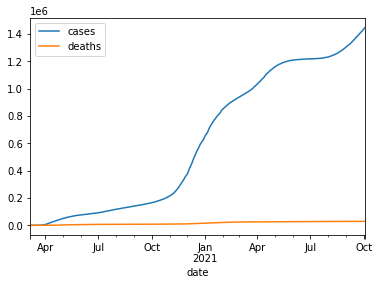

In [37]:
pa_df = us_states_df[us_states_df["state"] == "Pennsylvania"][["date","cases","deaths"]].set_index("date")
pa_df.plot()

### Apply, a way of operating on columns or rows 

The apply function allows one to run an arbitrary function across either columns or rows

Let's make a new column that is the cases per 1000 persons per day.

In [38]:
pa_df['cases_per_1000'] = pa_df['cases'].apply(lambda x: x/1000.0 )
pa_df.head()

,cases,deaths,cases_per_1000
date,,,
2020-03-06,2,0,0.002
2020-03-07,4,0,0.004
2020-03-08,6,0,0.006
2020-03-09,10,0,0.010
2020-03-10,12,0,0.012


Let's compute the incidence curve, which would be the new cases per day, to do this, we to use an apply that allows us to use the previous day's values, which would be `rolling`

<AxesSubplot:xlabel='date'>

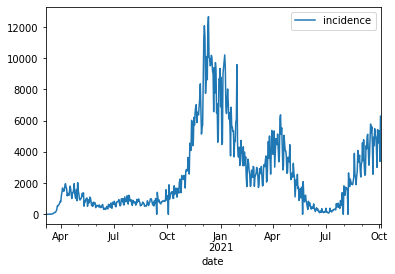

In [39]:
pa_df['incidence'] = pa_df['cases'].rolling(2).apply(lambda x: x[1]-x[0],raw=False)
pa_df[['incidence']].plot()

Now let's compute the incidence for all of the states

In [40]:
%%time
def calc_incidence(row, df):
    if(row['date'] != df[df['state'] == row['state']]['date'].min()):
        row_prev = df[(df['state'] == row['state']) & (df['date'] == row['date'] - pd.offsets.Day(1))]
        #print(type(row_prev['cases']))
        return row['cases'] - row_prev['cases'].iloc[0]
    else:
        return 0

us_states_df['incidence'] = us_states_df.apply(lambda x: calc_incidence(x,us_states_df),axis=1)


CPU times: user 12min 51s, sys: 0 ns, total: 12min 51s
Wall time: 12min 51s


CPU times: user 39.1 s, sys: 0 ns, total: 39.1 s
Wall time: 39.1 s


<AxesSubplot:xlabel='date'>

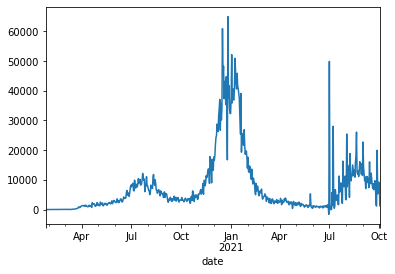

In [41]:
%%time
def calc_incidence_index(row, df):
    prev_index = (row.name[0], pd.to_datetime(row.name[1])-pd.offsets.Day(1))
    if prev_index in df.index: 
        return row['cases'] - df.loc[prev_index]['cases']
    else:
        return 0

us_states_df = us_states_df.set_index(['state','date'])
us_states_df['incidence_ind'] = us_states_df.apply(lambda x: calc_incidence_index(x,us_states_df),axis=1)
us_states_df.loc['California']['incidence_ind'].plot()



In [42]:
#us_states_df.set_index("index")
us_states_df

fips   cases  deaths  incidence  incidence_ind
state         date                                                      
Washington    2020-01-21    53       1       0          0              0
              2020-01-22    53       1       0          0              0
              2020-01-23    53       1       0          0              0
Illinois      2020-01-24    17       1       0          0              0
Washington    2020-01-24    53       1       0          0              0
...                        ...     ...     ...        ...            ...
Virginia      2021-10-03    51  869328   12806          0              0
Washington    2021-10-03    53  663660    7824        100            100
West Virginia 2021-10-03    54  244698    3722       1027           1027
Wisconsin     2021-10-03    55  814364    8901          0              0
Wyoming       2021-10-03    56   91169     996          0              0

[31926 rows x 5 columns]

### GroupBy,  aggregating grouped by category

The `groupby` member gives you a very powerful capability to create flexible aggregations

In [43]:
us_states_df = us_states_df.reset_index()
us_states_df[['date','state','incidence']].groupby('state').max()

,date,incidence
state,,
Alabama,2021-10-03,11142
Alaska,2021-10-03,3999
American Samoa,2021-10-03,0
Arizona,2021-10-03,17222
Arkansas,2021-10-03,4304
California,2021-10-03,64986
Colorado,2021-10-03,6499
Connecticut,2021-10-03,8457
Delaware,2021-10-03,1220


In [ ]:
us_states_df = us_states_df.reset_index()
peaks_df = us_states_df.iloc[us_states_df.groupby('state')['incidence'].idxmax()]
peaks_df = peaks_df.set_index('state')
peaks_df[['incidence']].plot.bar()

<AxesSubplot:xlabel='state'>

####  Let's aggregate a full US Incidence

In [ ]:
dates_df = us_states_df.groupby("date").sum()
dates_df["incidence"].plot()

In [53]:
us_states_df = us_states_df.reset_index()

In [61]:
us_states_df.iloc[us_states_df.groupby('state')['incidence'].idxmax()]

,index,state,date,fips,cases,deaths,incidence,incidence_ind
29769,29769,Alabama,2021-08-26,1,676795,12103,11142,11142
31535,31535,Alaska,2021-09-27,2,110887,535,3999,3999
31256,31256,American Samoa,2021-09-22,60,1,0,0,0
16846,16846,Arizona,2021-01-03,4,556384,9061,17222,17222
16737,16737,Arkansas,2021-01-01,5,229442,3711,4304,4304
16408,16408,California,2020-12-26,6,2129749,24221,64986,64986
14044,14044,Colorado,2020-11-13,8,155761,2541,6499,6499
16520,16520,Connecticut,2020-12-28,9,181200,5904,8457,8457
17071,17071,Delaware,2021-01-07,10,62949,949,1220,1220
30767,30767,District of Columbia,2021-09-13,11,57771,1165,805,805
